In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_dt = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Latest date in the database: " , latest_dt)

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("Date one year ago is: ", year_ago)

# Perform a query to retrieve the data and precipitation scores
m_prcp = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
        order_by(Measurement.date).all()
m_prcp


Latest date in the database:  ('2017-08-23',)
Date one year ago is:  2016-08-23


16-09-11'),
 (0.6, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.04, '2016-09-12'),
 (None, '2016-09-12'),
 (None, '2016-09-12'),
 (0.15, '2016-09-12'),
 (0.31, '2016-09-12'),
 (1.04, '2016-09-12'),
 (0.02, '2016-09-13'),
 (0.37, '2016-09-13'),
 (0.32, '2016-09-13'),
 (None, '2016-09-13'),
 (0.46, '2016-09-13'),
 (0.34, '2016-09-13'),
 (1.2, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.9, '2016-09-14'),
 (1.84, '2016-09-14'),
 (None, '2016-09-14'),
 (1.19, '2016-09-14'),
 (2.33, '2016-09-14'),
 (6.7, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.12, '2016-09-15'),
 (0.07, '2016-09-15'),
 (None, '2016-09-15'),
 (0.17, '2016-09-15'),
 (0.83, '2016-09-15'),
 (3.35, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.01, '2016-09-16'),
 (0.07, '2016-09-16'),
 (0.0, '2016-09-16'),
 (0.01, '2016-09-16'),
 (0.06, '2016-09-16'),
 (0.61, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.04, '2016-09-17'),
 (0.0, '2016-09-17'),
 (0.36, '2016-09-17'),
 (0.23, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-18'),
 (0.04, 

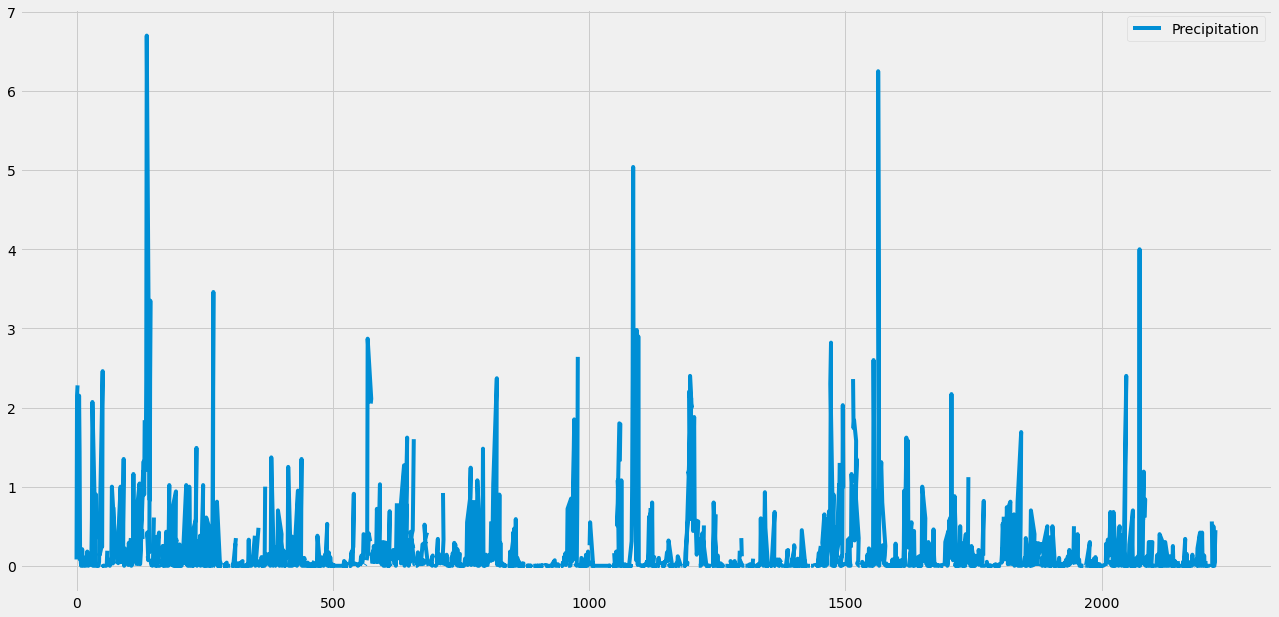

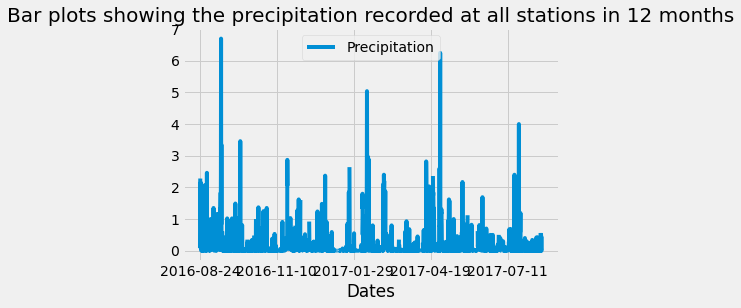

In [23]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(m_prcp, columns = ['Precipitation', 'Dates'])

# Sort the dataframe by date
df_dates = df.sort_values(by = 'Dates')
df_dates.plot(figsize=(20,10))
df_dates.plot(x = 'Dates', grid = True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.title("Bar plots showing the precipitation recorded at all stations in 12 months", size = 20)
plt.show()

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_dates.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset
station_m = session.query(func.count(Measurement.station)).all()
station_m

[(19550)]

In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_active_station = session.query(func.min(Measurement.tobs), func.Max(Measurement.tobs),\
    func.avg(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all()

print("The minimum, maximum and average temp for the most active station is: ", temp_active_station)

The minimum, maximum and average temp for the most active station is:  [(54.0, 85.0, 71.66378066378067)]


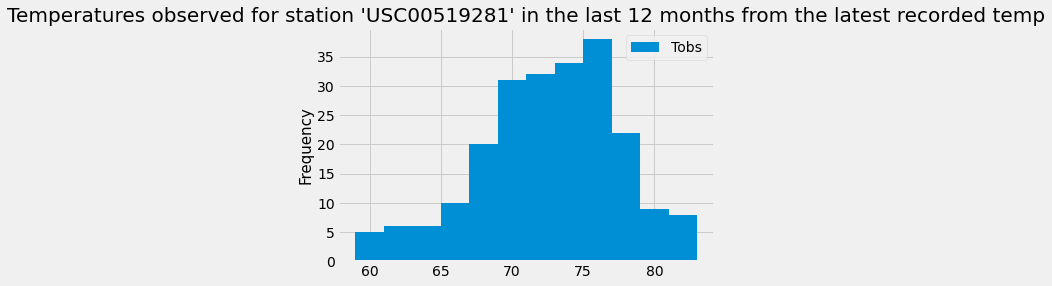

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= "2017,8,23").all()

results

df3 = pd.DataFrame(results, columns = ['Tobs'])

df3.hist(bins=12)

plt.ylabel("Frequency", fontsize=15)
plt.title("Temperatures observed for station 'USC00519281' in the last 12 months from the latest recorded temp", size=20)
labels = ["Tobs"]
plt.legend(labels)

plt.show()

# Close session

In [33]:
# Close Session
session.close()